In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/WHR2023.csv")

# Basic info
print(df.head())
print(df.info())
print(df.describe())


  Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   71.150                         0.961      -0.019   
1                   71.250            

In [27]:
# Handle missing values
df = df.dropna()

# Rename columns for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Confirm changes
print(df.columns)


Index(['Country_name', 'Ladder_score', 'Standard_error_of_ladder_score',
       'upperwhisker', 'lowerwhisker', 'Logged_GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption', 'Ladder_score_in_Dystopia',
       'Explained_by:_Log_GDP_per_capita', 'Explained_by:_Social_support',
       'Explained_by:_Healthy_life_expectancy',
       'Explained_by:_Freedom_to_make_life_choices',
       'Explained_by:_Generosity', 'Explained_by:_Perceptions_of_corruption',
       'Dystopia_+_residual'],
      dtype='object')


/tmp/ipython-input-728084964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ladder_score', y='Country_name', data=top_10, palette='Greens_r')


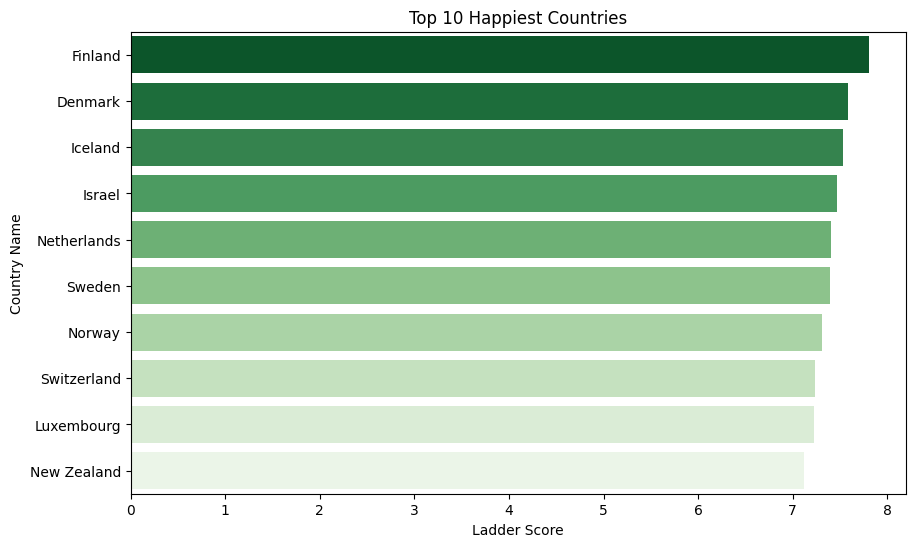

/tmp/ipython-input-728084964.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ladder_score', y='Country_name', data=bottom_10, palette='Reds_r')


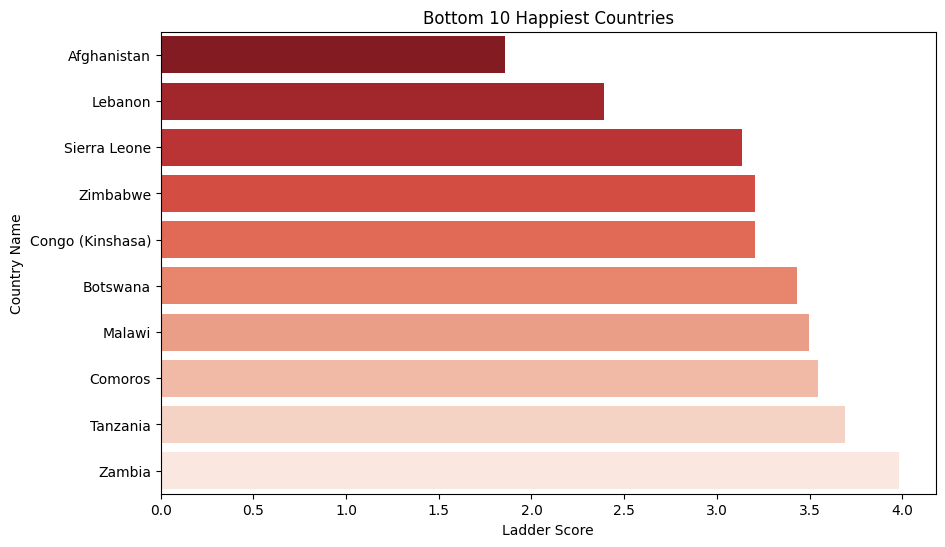

In [29]:
top_10 = df.nlargest(10, 'Ladder_score')
bottom_10 = df.nsmallest(10, 'Ladder_score')

plt.figure(figsize=(10,6))
sns.barplot(x='Ladder_score', y='Country_name', data=top_10, palette='Greens_r')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Ladder Score')
plt.ylabel('Country Name')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='Ladder_score', y='Country_name', data=bottom_10, palette='Reds_r')
plt.title('Bottom 10 Happiest Countries')
plt.xlabel('Ladder Score')
plt.ylabel('Country Name')
plt.show()

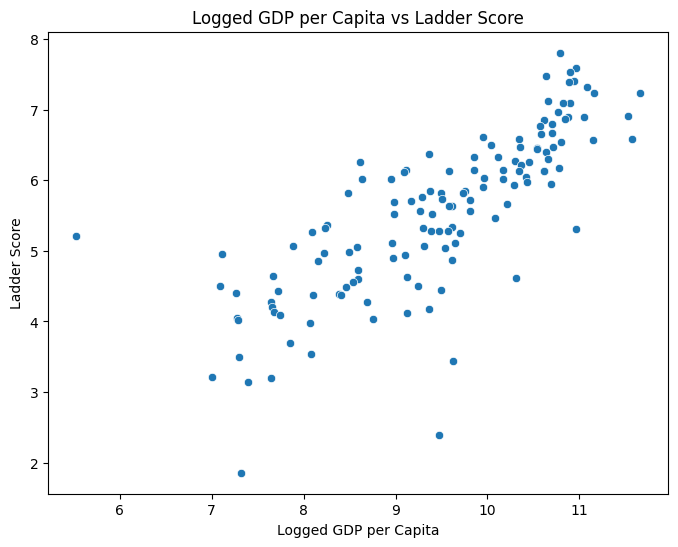

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Logged_GDP_per_capita', y='Ladder_score', data=df)
plt.title('Logged GDP per Capita vs Ladder Score')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Ladder Score')
plt.show()

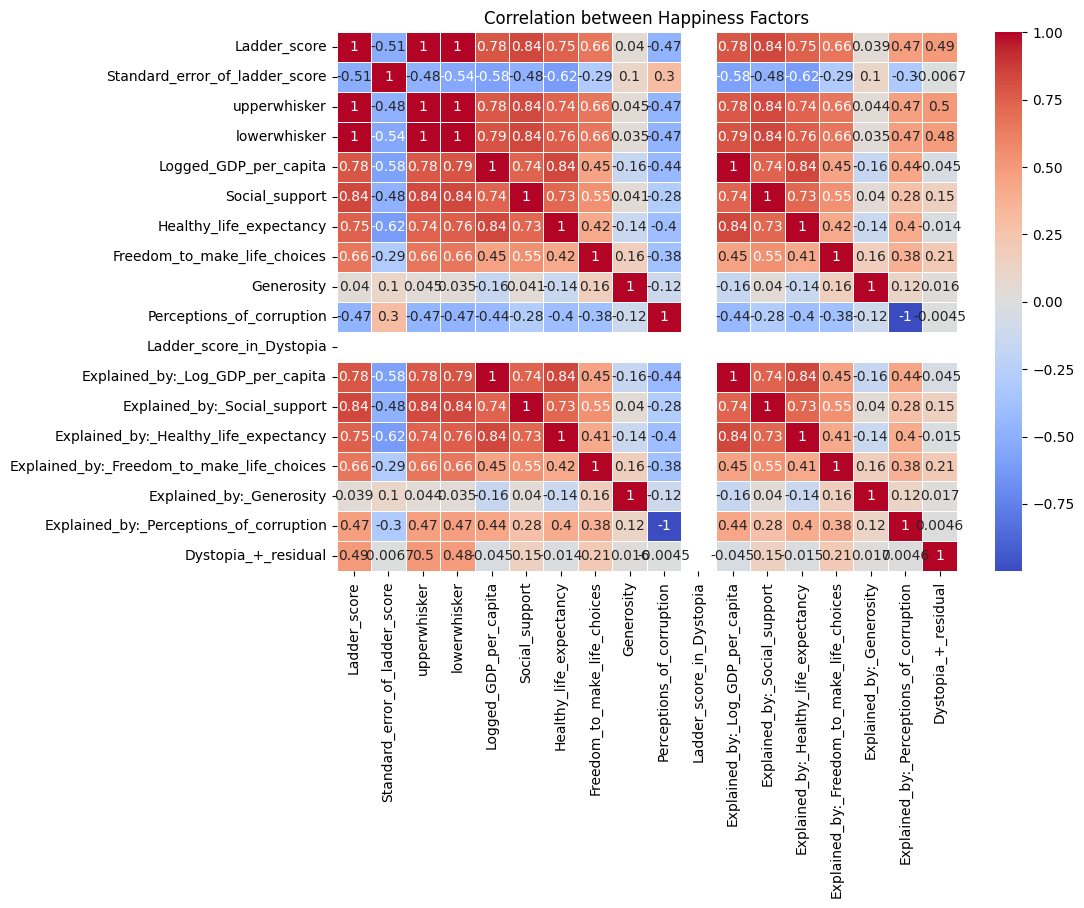

In [35]:
plt.figure(figsize=(10,7))

# Drop the country column dynamically (only if it exists)
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between Happiness Factors")
plt.show()


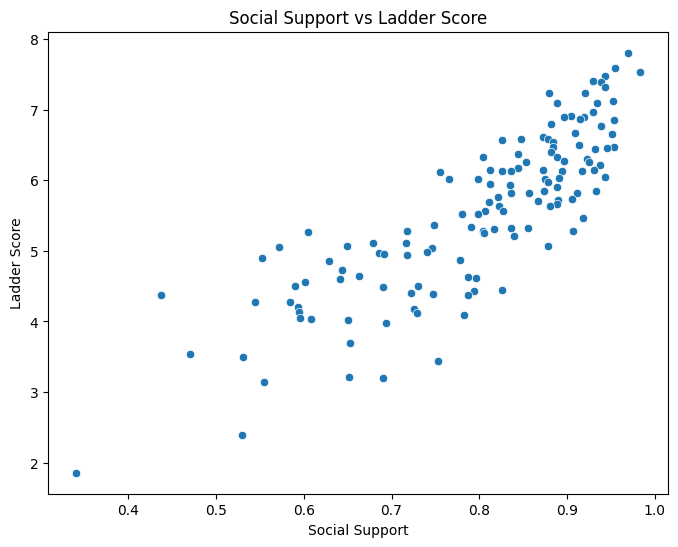

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Social_support', y='Ladder_score', data=df)
plt.title('Social Support vs Ladder Score')
plt.xlabel('Social Support')
plt.ylabel('Ladder Score')
plt.show()

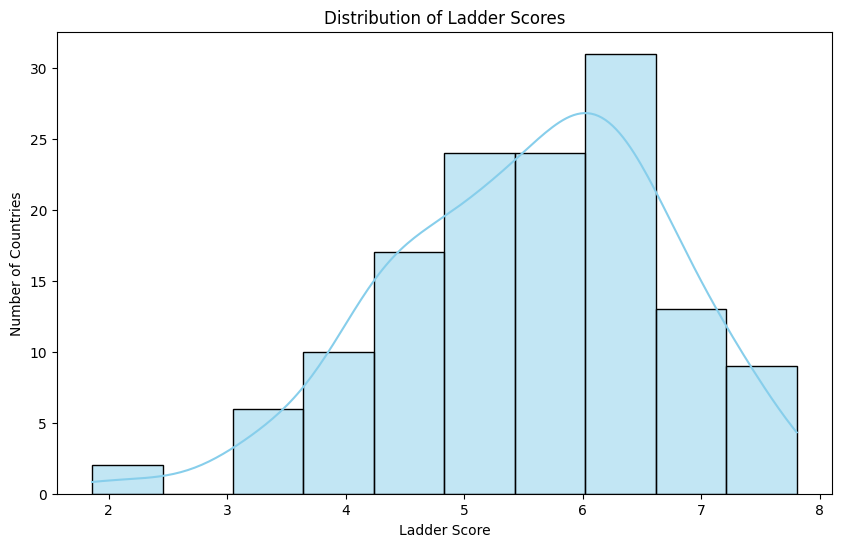

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['Ladder_score'], kde=True, color='skyblue')
plt.title("Distribution of Ladder Scores")
plt.xlabel("Ladder Score")
plt.ylabel("Number of Countries")
plt.show()

In [45]:
if 'Year' in df.columns:
    yearly = df.groupby('Year')['Happiness_Score'].mean().reset_index()
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Year', y='Happiness_Score', data=yearly, marker='o', color='green')
    plt.title("Average Global Happiness Score Over the Years")
    plt.ylabel("Average Happiness Score")
    plt.show()


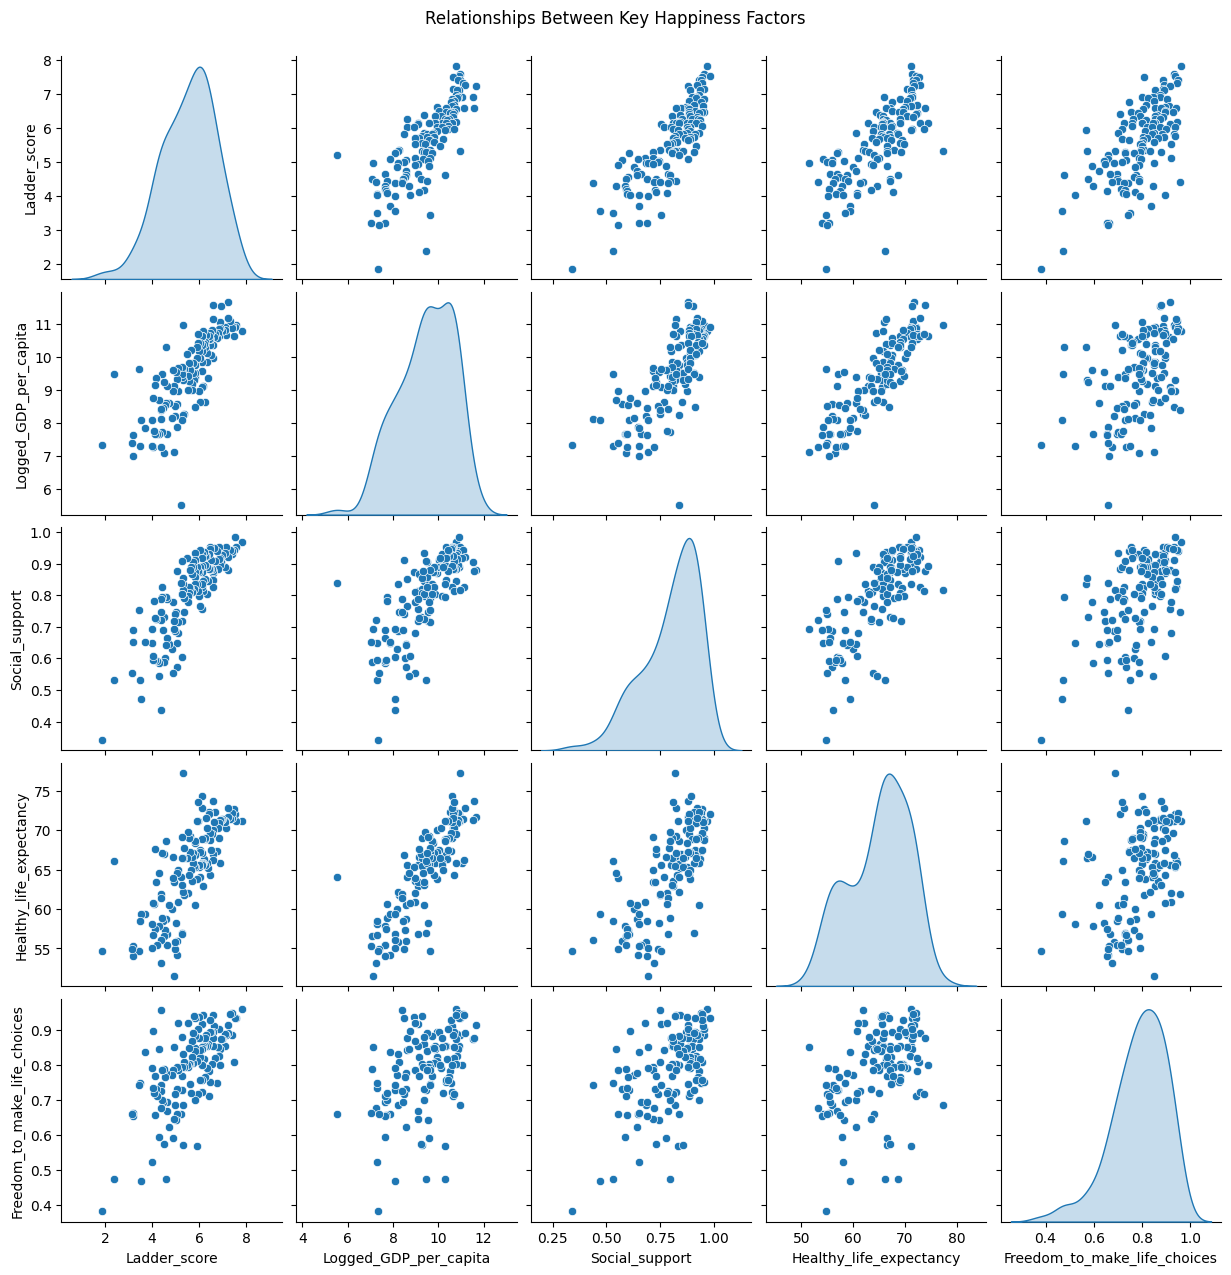

In [47]:
sns.pairplot(df[['Ladder_score', 'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices']], diag_kind='kde')
plt.suptitle("Relationships Between Key Happiness Factors", y=1.02)
plt.show()